# Basics

LSL provides readers for the two DP transient buffer outputs:  the transient buffer - wideband (TBW) and the transient buffer - narrowband (TBW) through the lsl.reader module.  First, download a small portion of a TBW data file:

In [2]:
# This may take a bit...
import os
from urllib.request import urlopen
from tempfile import mkdtemp
from lsl.reader import tbw

TEMPDIR = mkdtemp()
TBW_FILE = os.path.join(TEMPDIR, 'temp.tbw')
TBN_FILE = os.path.join(TEMPDIR, 'temp.tbn')

fh1 = urlopen('https://fornax.phys.unm.edu/lwa/data/firstlight/firstLightTBW.dat')
fh2 = open(TBW_FILE, 'wb')
fh2.write(fh1.read(tbw.FRAME_SIZE*1000))
fh1.close()
fh2.close()

print("TBW Size: %.1f kB" % (os.path.getsize(TBW_FILE)/1024.))

TBW Size: 1195.3 kB


To read in the TBW data:

In [4]:
from lsl.reader import tbw, errors

fh = open(TBW_FILE, 'rb')
for i in range(5):
    try:
        frame = tbw.read_frame(fh)
    except errors.SyncError:
        continue
    except errors.EOFError:
        break
        
    print("DP Stand Number: %i" % frame.id)
    print("-> Frame Count: %i" % frame.header.frame_count)
    print("-> Time tag: %i + %.6f s (%s)" % (frame.time[0], frame.time[1], frame.time))
    print("-> Mean value: %.3f" % frame.payload.data.mean())
fh.close()

DP Stand Number: 22
-> Frame Count: 1
-> Time tag: 1302134255 + 0.000000 s (2011-04-06 23:57:35)
-> Mean value: 12.954
DP Stand Number: 21
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 14.061
DP Stand Number: 22
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 8.617
DP Stand Number: 102
-> Frame Count: 1
-> Time tag: 1302134255 + 0.000000 s (2011-04-06 23:57:35)
-> Mean value: 7.439
DP Stand Number: 101
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 3.271


The try...except blocks help deal with problems in the file as the come up and keep things running smoothly.

One of the most confusing aspects of this interface is that the stand values returned by the "frame.id" method are DP stand numbers, which are used internally in DP to keep track of signals, and not LWA1 stand numbers.  However, the DP stand numbers can be related to LWA1 stand numbers using the lsl.common.stations.lwa1 instance:

In [5]:
from lsl.common.stations import lwa1

# Get the antenna list
antennas = lwa1.antennas

# Read in the first 5 frames
fh = open(TBW_FILE, 'rb')
for i in range(5):
    try:
        frame = tbw.read_frame(fh)
    except errors.SyncError:
        continue
    except errors.EOFError:
        break
        
    # Calculate the digitizer
    dig = 2*(frame.id-1) + 1
    
    print("DP Stand Number: %i" % frame.id)
    print("-> LWA1 Stand: %i" % antennas[dig-1].stand.id)
    print("-> Frame Count: %i" % frame.header.frame_count)
    print("-> Time tag: %i + %.06f s (%s)" % (frame.time[0], frame.time[1], frame.time))
    print("-> Mean value: %.3f" % frame.payload.data.mean())
fh.close()

DP Stand Number: 22
-> LWA1 Stand: 85
-> Frame Count: 1
-> Time tag: 1302134255 + 0.000000 s (2011-04-06 23:57:35)
-> Mean value: 12.954
DP Stand Number: 21
-> LWA1 Stand: 242
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 14.061
DP Stand Number: 22
-> LWA1 Stand: 85
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 8.617
DP Stand Number: 102
-> LWA1 Stand: 112
-> Frame Count: 1
-> Time tag: 1302134255 + 0.000000 s (2011-04-06 23:57:35)
-> Mean value: 7.439
DP Stand Number: 101
-> LWA1 Stand: 187
-> Frame Count: 2
-> Time tag: 1302134255 + 0.000002 s (2011-04-06 23:57:35.000002)
-> Mean value: 3.271


The interface for TBN data is similar.  To download a small section of data:

In [6]:
# This may take a bit...
from lsl.reader import tbn

fh1 = urlopen('https://lda10g.alliance.unm.edu/tutorial/Meteors/056761_000099453')
fh2 = open(TBN_FILE, 'wb')
fh2.write(fh1.read(tbn.FRAME_SIZE*1000))
fh1.close()
fh2.close()
    
print("TBN Size: %.1f kB" % (os.path.getsize(TBN_FILE)/1024.))

TBN Size: 1023.4 kB


In [8]:
from lsl.reader import tbn, errors

# Read in the first 5 frames
fh = open(TBN_FILE, 'rb')
for i in range(5):
    try:
        frame = tbn.read_frame(fh)
    except errors.SyncError:
        continue
    except errors.EOFError:
        break
        
    print("DP Stand Number: %i, pol. %i" % frame.id)
    print("-> Time tag: %i + %.6f s (%s)" % (frame.time[0], frame.time[1], frame.time))
    print("-> Mean value: %.3f + %.3f j" % (frame.payload.data.mean().real, frame.payload.data.mean().imag))
fh.close()

DP Stand Number: 232, pol. 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: 0.062 + 0.162 j
DP Stand Number: 232, pol. 1
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: 0.344 + 0.365 j
DP Stand Number: 255, pol. 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.709 + 0.436 j
DP Stand Number: 245, pol. 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.320 + -0.559 j
DP Stand Number: 255, pol. 1
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.252 + -0.178 j


Similar to the TBW case, the stand and polarizations returned by "frame.id" are from the interal DP structure.  To relate this to LWA1 stand/polarizations you use a similar method:

In [9]:
from lsl.common.stations import lwa1
    
# Get the antenna list
antennas = lwa1.antennas

# Read in the first 5 frames
fh = open(TBN_FILE, 'rb')
for i in range(5):
    try:
        frame = tbn.read_frame(fh)
    except errors.SyncError:
        continue
    except errors.EOFError:
        break
        
    # Calculate the digitizer
    stand,pol = frame.id
    dig = 2*(stand-1) + pol + 1
    
    print("DP Stand Number: %i, pol. %i" % (stand,pol))
    print("-> LWA1 Stand, pol.: %i, %i" % (antennas[dig-1].stand.id, antennas[dig-1].pol))
    print("-> Time tag: %i + %.6f s (%s)" % (frame.time[0], frame.time[1], frame.time))
    print("-> Mean value: %.3f + %.3f j" % (frame.payload.data.mean().real, frame.payload.data.mean().imag))
fh.close()

DP Stand Number: 232, pol. 0
-> LWA1 Stand, pol.: 34, 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: 0.062 + 0.162 j
DP Stand Number: 232, pol. 1
-> LWA1 Stand, pol.: 34, 1
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: 0.344 + 0.365 j
DP Stand Number: 255, pol. 0
-> LWA1 Stand, pol.: 11, 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.709 + 0.436 j
DP Stand Number: 245, pol. 0
-> LWA1 Stand, pol.: 211, 0
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.320 + -0.559 j
DP Stand Number: 255, pol. 1
-> LWA1 Stand, pol.: 11, 1
-> Time tag: 1397472446 + 0.953920 s (2014-04-14 10:47:26.953920)
-> Mean value: -0.252 + -0.178 j


# Generating and Plotting Spectra

Although computing the mean I/Q value for each frame isn't particularlly interesting this example shows how data can be extracted from within each TBN frame.  A more complicated example that generates spectra would look like:

(512,) (1, 512)


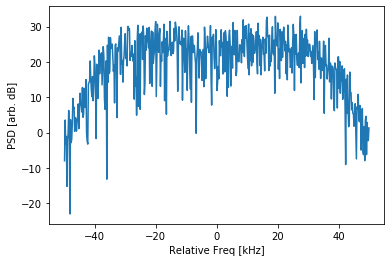

In [10]:
%matplotlib inline
from lsl.misc.mathutils import to_dB
from matplotlib import pyplot as plt

fh = open(TBN_FILE, 'rb')
srate = tbn.get_sample_rate(fh)   # Data sample rate in Hz
frame = tbn.read_frame(fh)
cFreq = frame.central_freq  # Data tuning in Hz
iq_data = frame.payload.data*1.0
iq_data.shape = (1,frame.payload.data.size)  # SpecMaster expects 2-D data

from lsl.correlator import fx as fxc
freq, spec = fxc.SpecMaster(iq_data, LFFT=512, sample_rate=srate, central_freq=cFreq) 
print(freq.shape, spec.shape)

fig = plt.figure()
ax = fig.gca()
ax.plot((freq-freq.mean())/1e3, to_dB(spec[0,:]))
ax.set_xlabel('Relative Freq [kHz]')
ax.set_ylabel('PSD [arb. dB]')
plt.show()

The "SpecMaster" function used above also works for TBW data.

# Post-Acquisition Beam Formings with TBN

For post-acquisition beam forming, you need need an azimuth (in degrees) and elevation (in degrees) to point the beam towards.  For planets, this can be accomplished using the pyephem package that is required by lsl.  For example, compute the location of Jupiter at LWA-1 on 12/17/2010 at 21:18 UTC (JD 2,455,548.38787):

In [11]:
import math
import ephem
from lsl.common import stations

lwa1 = stations.lwa1
lwaObserver = lwa1.get_observer(2455548.38787, JD=True)
jove = ephem.Jupiter()
jove.compute(lwaObserver)
print("Jupiter:  az -> %.1f, el -> %.1f" % (jove.az*180/math.pi, jove.alt*180/math.pi))

Jupiter:  az -> 112.4, el -> 24.4


For fixed positions, use:

In [12]:
lwaObserver.date = '2010/12/17 21:18:34'

cyga = ephem.FixedBody()
cyga._ra = '19:59:28.30'
cyga._dec = '+40:44:02'
cyga.compute(lwaObserver)
print("Cygnus A:  az -> %.1f, el -> %.1f" % (cyga.az*180/math.pi, cyga.alt*180/math.pi))

Cygnus A:  az -> 10.0, el -> 83.2


After TBN data have been read in and a pointing position has been found, a beam can be formed through phase-and-sum beamforming:

In [13]:
from lsl.misc import beamformer

antennas = [lwa1.antennas[0],]

beamdata = beamformer.phase_and_sum(antennas, iq_data, sample_rate=1e5, azimuth=10.9, elevation=83.2)
print(beamdata.shape)

(1, 512)


# Additional Info
In addition to the modules provided in LSL there are also a variety of scripts in the [commissioning repo](https://github.com/lwa-project/commissioning) to analyze data.
